In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import osmnx
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [2]:
london_stops = gpd.read_file('first_outputs/london_processed.shp')
london_stops

,id,commonName,indicator,stopType,lat,lon,lines,nearest,node_dist,cbd_dist,geometry
0,490000149L,Moorgate Station,Stop L,NaptanPublicBusCoachTram,51.517849,-0.088163,0,4401149234,19.044569,3311.015,POINT (-0.08816 51.51785)
1,490003025W,Abbey Lane,Stop L,NaptanPublicBusCoachTram,51.533785,-0.007183,8,5808269978,17.145486,9256.079,POINT (-0.00718 51.53379)
2,490003027E,Abbey Road,Stop X,NaptanPublicBusCoachTram,51.539674,-0.187845,3,1619521343,16.085124,6335.373,POINT (-0.18785 51.53967)
3,490003027W,Abbey Road,Stop M,NaptanPublicBusCoachTram,51.539970,-0.186680,3,1619521361,24.727386,6383.693,POINT (-0.18668 51.53997)
4,490003028E,Abbey Road,Stop H,NaptanPublicBusCoachTram,51.529348,-0.269899,3,3981663002,18.159409,11926.899,POINT (-0.26990 51.52935)
...,...,...,...,...,...,...,...,...,...,...,...
22409,490015020D,Yorkshire Road,Stop D,NaptanPublicBusCoachTram,51.398989,-0.128532,1,244153184,20.166472,13647.499,POINT (-0.12853 51.39899)
22410,490013756N,Zambezie Drive,->N,NaptanPublicBusCoachTram,51.623013,-0.048582,0,248810976,32.267094,15853.509,POINT (-0.04858 51.62301)
22411,490013275N,Zangwill Road,Stop SZ,NaptanPublicBusCoachTram,51.472283,0.045127,1,90271359,26.976728,13827.742,POINT (0.04513 51.47228)
22412,490013275S,Zangwill Road,Stop SU,NaptanPublicBusCoachTram,51.472046,0.045303,1,90271359,12.413708,13827.742,POINT (0.04530 51.47205)


Text(0, 0.5, 'Distance to nearest intersection')

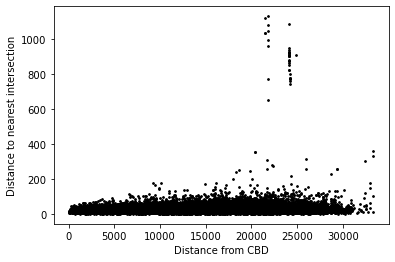

In [16]:
plt.scatter(london_stops.cbd_dist, london_stops.node_dist, s=3, c='k')
plt.xlabel('Distance from CBD')
plt.ylabel('Distance to nearest intersection')

r squared 0.023355555484140256


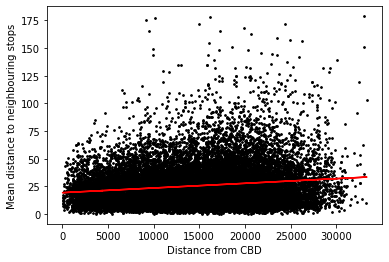

In [14]:
from sklearn.linear_model import LinearRegression

london_stops_clean = london_stops[london_stops.node_dist<200]

x = np.array(london_stops_clean.cbd_dist).reshape((-1, 1))
y = np.array(london_stops_clean.node_dist)
m = LinearRegression().fit(x, y)
print("r squared", m.score(x, y))
                
plt.scatter(london_stops_clean.cbd_dist, london_stops_clean.node_dist, s=3, c='k')
plt.xlabel('Distance from CBD')
plt.ylabel('Mean distance to neighbouring stops')
plt.plot(x, m.predict(x), color='red')

In [5]:
london_stops[london_stops.node_dist>400]

,id,commonName,indicator,stopType,lat,lon,lines,nearest,node_dist,cbd_dist,geometry
975,490003588E,Banstead Downs Golf Course,---,NaptanPublicBusCoachTram,51.330684,-0.215806,0,33172951,962.547144,21837.054,POINT (-0.21581 51.33068)
976,490003588W,Banstead Downs Golf Course,---,NaptanPublicBusCoachTram,51.330378,-0.215803,0,33172951,994.779823,21837.054,POINT (-0.21580 51.33038)
5294,490005887N,Cuddington Golf Course,Stop,NaptanPublicBusCoachTram,51.336220,-0.219711,0,33172951,650.627239,21837.054,POINT (-0.21971 51.33622)
7610,490014144S,Gilhams Avenue,Stop,NaptanPublicBusCoachTram,51.333464,-0.218239,0,33172951,768.699836,21837.054,POINT (-0.21824 51.33346)
9194,49000802620,Heathrow Airport Terminal 3,Stand 19,NaptanPublicBusCoachTram,51.471896,-0.456749,0,2198234328,822.837046,24119.968,POINT (-0.45675 51.47190)
9195,490008026E,Heathrow Airport Terminal 3,Stand 17,NaptanPublicBusCoachTram,51.472369,-0.457122,0,1148911341,773.997641,24271.625,POINT (-0.45712 51.47237)
9196,490008026N,Heathrow Airport Terminal 3,Bay 1,NaptanPublicBusCoachTram,51.472369,-0.457122,0,1148911341,773.997641,24271.625,POINT (-0.45712 51.47237)
9197,490008026W,Heathrow Airport Terminal 3,->W,NaptanPublicBusCoachTram,51.471896,-0.456749,0,2198234328,822.837046,24119.968,POINT (-0.45675 51.47190)
9198,490008016N2,Heathrow Central,Stand,NaptanPublicBusCoachTram,51.470839,-0.452307,0,1148911395,946.144106,24106.103,POINT (-0.45231 51.47084)
9199,4900080161,Heathrow Central Bus Station,Stand 1,NaptanPublicBusCoachTram,51.470931,-0.452448,0,1148911395,934.367117,24106.103,POINT (-0.45245 51.47093)


## Node distance histogram

(array([1.8197e+04, 3.6760e+03, 3.9500e+02, 7.1000e+01, 1.6000e+01,
        3.0000e+00, 8.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00, 1.1000e+01,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.84352058e-01, 3.78396502e+01, 7.54949483e+01, 1.13150246e+02,
        1.50805544e+02, 1.88460843e+02, 2.26116141e+02, 2.63771439e+02,
        3.01426737e+02, 3.39082035e+02, 3.76737333e+02, 4.14392631e+02,
        4.52047929e+02, 4.89703227e+02, 5.27358526e+02, 5.65013824e+02,
        6.02669122e+02, 6.40324420e+02, 6.77979718e+02, 7.15635016e+02,
        7.53290314e+02, 7.90945612e+02, 8.28600910e+02, 8.66256208e+02,
        9.03911507e+02, 9.41566805e+02, 9.79222103e+02, 1.01687740e+03,
        1.05453270e+03, 1.09218800e+03, 1.12984330e+03]),
 <BarContainer object of 30 

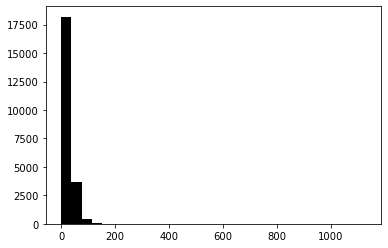

In [26]:
plt.hist(london_stops.node_dist, bins=30, color='k')

(array([1.234e+03, 3.650e+03, 3.656e+03, 3.509e+03, 2.913e+03, 2.240e+03,
        1.589e+03, 1.050e+03, 7.770e+02, 4.950e+02, 3.190e+02, 2.780e+02,
        1.480e+02, 1.130e+02, 1.000e+02, 5.600e+01, 5.800e+01, 3.700e+01,
        2.700e+01, 2.200e+01, 2.200e+01, 1.700e+01, 7.000e+00, 1.000e+01,
        4.000e+00, 8.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 3.000e+00]),
 array([  0.18435206,   5.90763655,  11.63092104,  17.35420553,
         23.07749002,  28.80077451,  34.524059  ,  40.24734349,
         45.97062798,  51.69391247,  57.41719696,  63.14048145,
         68.86376594,  74.58705043,  80.31033492,  86.03361941,
         91.7569039 ,  97.48018839, 103.20347288, 108.92675737,
        114.65004186, 120.37332635, 126.09661084, 131.81989533,
        137.54317982, 143.26646431, 148.9897488 , 154.71303329,
        160.43631778, 166.15960227, 171.88288676]),
 <BarContainer object of 30 artists>)

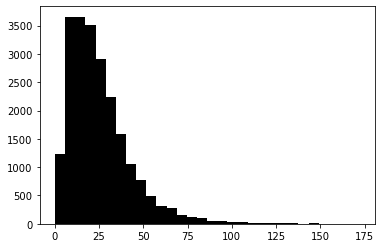

In [30]:
plt.hist(london_stops[london_stops.node_dist < 175].node_dist, bins=30, color='k')

In [21]:
help(london_stops.node_dist.hist)

Help on method hist_series in module pandas.plotting._core:

hist_series(by=None, ax=None, grid:bool=True, xlabelsize:Union[int, NoneType]=None, xrot:Union[float, NoneType]=None, ylabelsize:Union[int, NoneType]=None, yrot:Union[float, NoneType]=None, figsize:Union[Tuple[int, int], NoneType]=None, bins:Union[int, Sequence[int]]=10, backend:Union[str, NoneType]=None, legend:bool=False, **kwargs) method of pandas.core.series.Series instance
    Draw histogram of the input series using matplotlib.
    
    Parameters
    ----------
    by : object, optional
        If passed, then used to form histograms for separate groups.
    ax : matplotlib axis object
        If not passed, uses gca().
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels.
    ylabelsize : int, default None
        If specified changes the y-axis label

Text(0.5, 0, 'Number of bus stops')

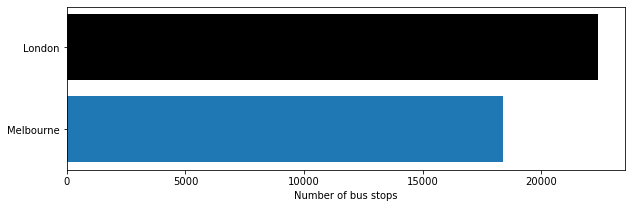

In [43]:
plt.figure(1, (10,3))
plt.barh(['Melbourne','London'], [18404,22414], color=['#1f77b4','k'])
plt.xlabel('Number of bus stops')

Text(3.12, 940232, '930232')

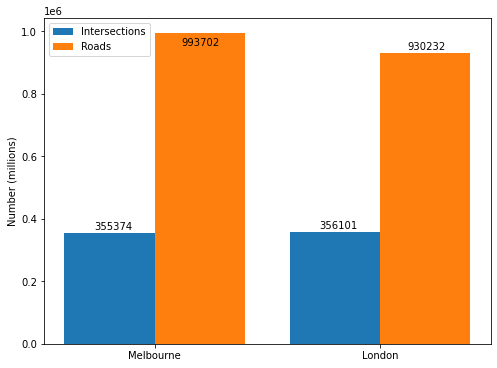

In [71]:
# Melb, Lon
plt.figure(1, (8,6))
plt.bar([1.8, 2.8], [355374, 356101], 0.4)
plt.bar([2.2, 3.2], [993702, 930232], 0.4)
plt.xticks([2, 3],['Melbourne', 'London'])
plt.legend(['Intersections', 'Roads'])
plt.ylabel('Number (millions)')
plt.text(1.73, 365574, '355374')
plt.text(2.12, 953502, '993702')
plt.text(2.73, 368101, '356101')
plt.text(3.12, 940232, '930232')

Text(3.1, 940232, '930232')

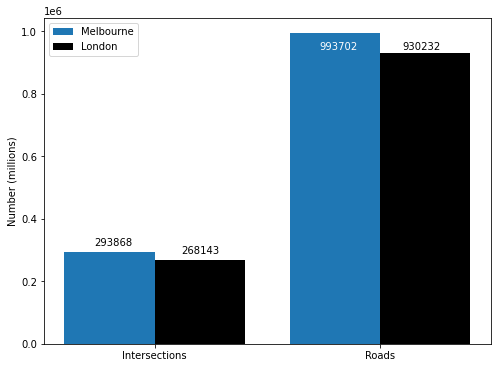

In [80]:
plt.figure(1, (8,6))
plt.bar([1.8, 2.8], [293868, 993702], 0.4, color='#1f77b4') # Melb
plt.bar([2.2, 3.2], [268143, 930232], 0.4, color='k') # Lon
plt.xticks([2, 3],['Intersections', 'Roads'])
plt.legend(['Melbourne', 'London'])
plt.ylabel('Number (millions)')
plt.text(1.73, 313868, '293868')
plt.text(2.12, 288143, '268143')
plt.text(2.73, 940702, '993702', color='w')
plt.text(3.10, 940232, '930232')